{10: 0.44000000000000006, 20: 0.4800000000000001, 30: 0.4, 50: 0.4, 70: 0.32, 100: 0.36000000000000004}


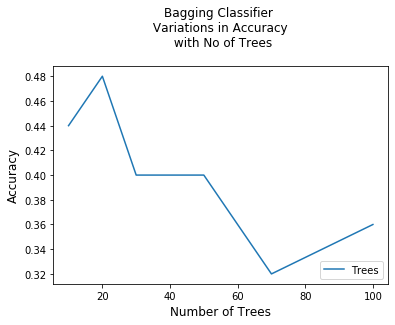


 {10: 0.44000000000000006, 20: 0.4800000000000001, 30: 0.4, 50: 0.4, 70: 0.32, 100: 0.36000000000000004}
Number of trees 10 ----> Accuracy Score = 0.44000000000000006
Number of trees 20 ----> Accuracy Score = 0.4800000000000001
Number of trees 30 ----> Accuracy Score = 0.4
Number of trees 50 ----> Accuracy Score = 0.4
Number of trees 70 ----> Accuracy Score = 0.32
Number of trees 100 ----> Accuracy Score = 0.36000000000000004


In [2]:
"""
Bagging Classifier 

"""

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import numpy as np

class Bagging_Classifier():
    def __init__(self):
        #self.split = [2,3,4,5,10]
        self.trees = [10,20,30,50,70,100]
    
    def dataset_split(self):
        df = pd.read_csv("dp6.csv")  
        X = df.drop('Y',axis=1)
        y = df.Y
        return X,y

    def model_creation(self):
        acc_score = {}       
        for i in self.trees:    
            kfold = model_selection.KFold(n_splits=5)
            model = BaggingClassifier(n_estimators=i, random_state=0)
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            #accuracy_score = results.mean()
            #acc.append(accuracy_score)
            acc_score[i]=results.mean()
        print(acc_score)

        return acc_score
    
    def graph(self, acc_score):
        names = list(acc_score.keys())
        values = list(acc_score.values())
        plt.plot(names,values)
        plt.title("Bagging Classifier \n Variations in Accuracy \n with No of Trees", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('Number of Trees', fontsize = "large")
        plt.legend(["Trees"], loc='lower right')
        plt.show()
        



bag_cla = Bagging_Classifier()
X,y = bag_cla.dataset_split()
acc_score = bag_cla.model_creation()
bag_cla.graph(acc_score)

print("\n",acc_score)

for x,y in acc_score.items():
    print("Number of trees {0} ----> Accuracy Score = {1}". format (x, np.mean(acc_score[x])) )
